# FUNÇÕES PARTE II

## ARGUMENTOS: TIPADOS, PADRONIZADOS E NOMEADOS

Será utilizado a função `empuxo` em várias versões tendo como base os argumentos volume, densidade e aceleração da gravidade. Dada a função `empuxo` definida de forma usual:

In [1]:
function empuxo_0( v, d, g)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return v*d*g
end

empuxo_0 (generic function with 1 method)

In [2]:
empuxo_0( 0.05, 1, 10)

Volume: 0.05 m³
Densidade: 1 kg/m³
A.gravidade: 10 m/s²


0.5

**Argumentos Tipados**

É possível definir um tipo para um argumento dentre os vários tipos disponíveis ou construídos em Julia. Dessa forma a função somente aceitará os valores do tipo definido e qualquer valor diferente resultará em erro.

In [3]:
function empuxo_1( v, d::Float64, g::Float64)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return v*d*g
end

empuxo_1 (generic function with 1 method)

In [4]:
empuxo_1(0.05, 1.0, 10.0)

Volume: 0.05 m³
Densidade: 1.0 kg/m³
A.gravidade: 10.0 m/s²


0.5

In [6]:
# passando os tipos Float64, Float64 e Int64
empuxo_1(0.05, 1.0, 10)

LoadError: MethodError: no method matching empuxo_1(::Float64, ::Float64, ::Int64)
Closest candidates are:
  empuxo_1(::Any, ::Float64, !Matched::Float64) at In[3]:2

Observe que o erro `"MethodError: no method matching empuxo_1(::Float64, ::Float64, ::Int64)"` significa que não há um método compatível com os argumentos passados. O erro está no argumento `gravidade` que foi passado como inteiro e deve ser do tipo `Float64`. Julia informa o local do erro e tipo correto em  `!Matched::Float64`.
```
```

**Argumentos padronizados**

In [7]:
# Função genérica

function empuxo_2( v, d = 1.0, g = 9.8)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return v*d*g
end

empuxo_2 (generic function with 3 methods)

In [8]:
empuxo_2(0.05, 1.0, 10)

Volume: 0.05 m³
Densidade: 1.0 kg/m³
A.gravidade: 10 m/s²


0.5

In [10]:
# se não for passado nenhum outro argumento a função utiliza os valores padrões
empuxo_2(0.05)

Volume: 0.05 m³
Densidade: 1.0 kg/m³
A.gravidade: 9.8 m/s²


0.49000000000000005

In [11]:
# a ordem dos argumentos importa
empuxo_2(0.05, 10, 1.0)

Volume: 0.05 m³
Densidade: 10 kg/m³
A.gravidade: 1.0 m/s²


0.5

Observe que neste exemplo a ordem dos elementos é importante e embora o valor calculado esteja correto, os valores das variáveis estão trocados.

```
```

**Argumentos Nomeados**

Algumas funções precisam de um grande número de argumentos ou têm um grande número de comportamentos. Lembrar de todos os argumentos e ordem de entrada pode ser difícil. Dessa forma, os argumentos nomeados podem tornar essas interfaces complexas mais fáceis de usar e estender permitindo que os argumentos sejam identificados por nome em vez de apenas por posição.

In [14]:
function empuxo_3( v; d = 1.0, g = 9.8)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return d*g*v
end

empuxo_3 (generic function with 1 method)

In [15]:
# a ordem dos argumentos não importa desde que seja indicado o nome do argumento e valor
empuxo_3(0.5, g = 10 , d = 0.9)

Volume: 0.5 m³
Densidade: 0.9 kg/m³
A.gravidade: 10 m/s²


4.5

In [16]:
# a ordem dos argumentos não importa desde que seja indicado o nome do argumento e valor
empuxo_3(0.5 , d = 0.9 , g = 10)

Volume: 0.5 m³
Densidade: 0.9 kg/m³
A.gravidade: 10 m/s²


4.5

In [17]:
# se não for passado nenhum outro argumento a função utiliza os valores padrões
empuxo_3(0.5)

Volume: 0.5 m³
Densidade: 1.0 kg/m³
A.gravidade: 9.8 m/s²


4.9

In [18]:
# só é possível passar parâmetros indicando o nome do argumento e valor
empuxo_3(0.5, 0.9 , 10)

LoadError: MethodError: no method matching empuxo_3(::Float64, ::Float64, ::Int64)
Closest candidates are:
  empuxo_3(::Any; d, g) at In[14]:2

** Argumentos indefinidos**

In [19]:
function f1(a, b...)
    sum([a, b...])
end

f1 (generic function with 1 method)

In [20]:
f1(1, 2, 3, 4)

10

O mesmo exemplo utilizando função anônima

In [21]:
((a, b...) -> sum([a,b...]))(1, 2, 3, 4)

10

 ** Operadores como argumento **

In [22]:
function f2(operador, x, y...)
    return operador(x, y...)
end

f2 (generic function with 1 method)

In [23]:
f2(+, 10, 1, 10, 2)

23

In [24]:
f2(lcm, 10, 1, 10, 2)

10

## DESPACHO MÚLTIPLO

Julia permite que uma função tenha mais de um método de tal forma que o método é determinado conforme os argumentos quando a função é executada. Em linguagens orientadas a objetos tradicionais, um método é escolhido com base apenas no tipo de objeto e esse paradigma é chamado de despacho único. Em Julia, a combinação de todos os argumentos de função determina qual método é escolhido. Esta é a base do despacho múltiplo. Para definir um novo método para uma função (também chamado de sobrecarga), basta usar o mesmo nome da função mas com diferentes tipos de argumento. Uma lista de todos os métodos é armazenada em uma tabela na própria função chamada de vtable. Quando uma função é chamada, O compilador pesquisará na vtable da função em tempo de execução para descobrir qual o método deve chamar com base nos argumentos passados.

In [24]:
function empuxo_multiplo( v, d, g)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return v*d*g
end

function empuxo_multiplo( v, d::Float64, g::Float64)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return v*d*g
end

function empuxo_multiplo( v, d = 1.0, g = 9.8)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return v*d*g
end

function empuxo_multiplo( v; d = 1.0, g = 9.8)
    println("Volume: $v m³")
    println("Densidade: $d kg/m³")
    println("A.gravidade: $g m/s²")
    
    return v*g*d
end

empuxo_multiplo (generic function with 4 methods)

In [25]:
empuxo_multiplo(0.05, 1, 10)

Volume: 0.05 m³
Densidade: 1 kg/m³
A.gravidade: 10 m/s²


0.5

In [26]:
empuxo_multiplo(0.05, 1.0, 10.0)

Volume: 0.05 m³
Densidade: 1.0 kg/m³
A.gravidade: 10.0 m/s²


0.5

In [27]:
empuxo_multiplo(0.05)

Volume: 0.05 m³
Densidade: 1.0 kg/m³
A.gravidade: 9.8 m/s²


0.49000000000000005

In [28]:
empuxo_multiplo(0.05 , d = 1.0 , g = 10)

Volume: 0.05 m³
Densidade: 1.0 kg/m³
A.gravidade: 10 m/s²


0.5

In [29]:
# a ordem não importa
empuxo_multiplo(0.05 , g = 10 , d = 1.0)

Volume: 0.05 m³
Densidade: 1.0 kg/m³
A.gravidade: 10 m/s²


0.5

** Funções que recebem outras funções como argumento**

**Circuito RLC**

Um circuito RLC série consiste de um resistor de 300Ω, um capacitor de 3μF  e uma  bobina de 200mH conectados a um  gerador de fem  CA de 110V, no  qual  oscila numa frequência  de 90Hz. Calcular a Impedância.

<img src="Figuras/RLC.png" align="center" width="250">

Formulas do problema:

Reatancia capacitiva ($\Omega $): $ \displaystyle X_c = {1 \over {2 \pi f c}}$ : 

Reatancia indutiva ($\Omega $): $ \displaystyle X_l = 2 \pi f l$ 

Impedancia total ($\Omega $) : $ \displaystyle Z_t = \sqrt{r^2 + (x_l - x_c)^2} $ 

Sendo $f$ a frequencia (Hz), $c$ a capacitância (F), $l$ a indutância (H) e $r$ a resistencia (ohm)

In [6]:
# Reatâcia capacitiva em função da frequencia e capacitância
Xc(f, c) = 1/(2*pi*f*c)

# Reatância Indutiva em função da frequencia e indutância
Xl(f, l) = 2*pi*f*l

# Impedância Total em fução da Xc, Xl e resistência
Zt(xc, xl, r) = sqrt(r^2 + (xl - xc)^2)  

Zt (generic function with 1 method)

Passando os dados da frequencia da rede CA, capacitância do capacitor, indutância da bobina e resistencia:

In [7]:
Zt(Xc(90, 3e-6), Xl(90, 200e-3), 300 ) 

562.9600431580267

A vantagem desta modelagem é que além de poder passar para a função $Z_t$ as funções definidas de $X_c$ e $X_l$, é possível também passar diretamente os valores. Isto dá mais agilidade ao pesquisador.

In [8]:
# Xc = 589.5 , Xl = 113.1 e r = 300
Zt(589.5, 113.1, 300)

562.9893071808735

Dessa forma, podemos visualizar a variação da impedância, por exemplo, em função da frequencia da fonte CA. No exemplo abaixo, a frequencia varia de 1 a 120Hz

In [17]:
# Dados de entrada
Fq = 1:120
ImpT = Zt.(Xc.(Fq, 3e-6), Xl.(Fq, 200e-3), 300 );

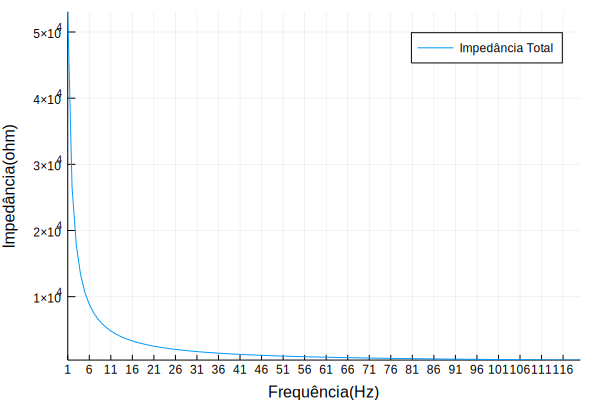

In [22]:
# Gráfico
using Plots
gr()

plot(Fq, ImpT, label = "Impedância Total", xticks = 1:5:120, xlabel = "Frequência(Hz)", ylabel = "Impedância(ohm)")

De acordo com o gráfico, a impedância do circuito diminui com o almento da frequência de tal forma que a impedância cai pela metade quando a frequência é aproximadamente 1.98 Hz

## FUNÇÕES ANÔNIMAS

Em algumas situações podemos ter funções que serão utilizadas apenas uma vez em todo código - para criar um gráfico por exemplo. Neste caso, não há necessidade de alocarmos uma função na memória e dessa forma podemos utilizar uma função sem nome conhecida como função anômima. "Funções anônimas não têm um nome para serem invocadas diretamente, mas são muito usadas como parâmetros para outras funções, ou são atribuídas a uma variável, que acaba funcionando como um nome"(BALDUINO, XX). Ao definir uma função anônima, devemos observar que o resultado é uma função genérica, mas com um nome gerado pelo compilador na forma:
```julia
(::#a)(generic function with b method)
```
Sendo `#a` representa o número gerado pelo compilador baseado em uma numeração consecutiva e `b` o número de métodos. O uso principal para funções anônimas é passá-las para funções que assumem outras funções como argumentos ou quando uma função precisa ser redefinida várias vezes. Em geral são mais rápidas que as funções genéricas. Sintaxe:

Tupla de retorno único:
```julia
(arg_1, arg_2, ..., arg_n ->  expr_1, expr_2,..., expr_n)(valor_1, valor_2, ...., valor_n)
```

Outra possibilidade é vincular a função anônima a um nome para ser reutilizada em outras partes do código. Uma aplicação disto ocorre quando queremos criar uma função anônima com várias expressões. Sintaxe:
```julia
nome = (arg_1, arg_2, ..., arg_n ->  expr_1, expr_2,..., expr_n)(valor_1, valor_2, ...., valor_n)
```
```julia

nome = (arg_1, arg_2, ..., arg_n-> begin
        expressões
        ...
end)
```

In [1]:
# Um argumento e retorno simples
(x -> x^3 - 2*x^2 - 1)(0)

-1

In [2]:
# Nome atribuído a uma função anônima com um argumento e retorno simples
f = x -> x^3 - 2*x^2 - 1

#5 (generic function with 1 method)

In [3]:
f(0)

-1

Vejamos agora como estão memória

In [4]:
varinfo()

| name        |     size | summary                         |
|:----------- | --------:|:------------------------------- |
| Base        |          | Module                          |
| Core        |          | Module                          |
| Main        |          | Module                          |
| f           |  0 bytes | getfield(Main, Symbol("##5#6")) |
| startupfile | 62 bytes | String                          |


O tipo do retorno do cálculo da função pode ser definido pelo programador.

In [5]:
# um argumento e retorno múltiplo vetor
(x -> [x^3 - 2*x^2 - 1 , x + 1] )(0)

2-element Array{Int64,1}:
 -1
  1

In [6]:
# um argumento e retorno múltiplo tupla
(x -> (x^3 - 2*x^2 - 1 , x + 1) )(0)

(-1, 1)

In [7]:
# um argumento e retorno múltiplo conjunto
(x -> Set([x^3 - 2*x^2 - 1 , x + 1]) )(0)

Set([-1, 1])

In [8]:
# um argumento e retorno múltiplo dicionário
(x -> Dict("s_1" => x^3 - 2*x^2 - 1 , "s_2" => x + 1) )(0)

Dict{String,Int64} with 2 entries:
  "s_1" => -1
  "s_2" => 1

In [9]:
# dois argumentos e retorno único
((x, y) -> 2*y - 1 + x)(0, 0)

-1

In [10]:
# dois argumentos e retorno múltiplo tupla
( (x, y) -> (2*y - 1 + x, x*y))(0, 0)

(-1, 0)

Uma forma prática de trabalhar com funções anônimas grandes é utilziar um bloco de código com ``` begin ... end```

In [11]:
g = x -> begin
    if x < 10 && iseven(x) # se o valor de x é menor que 10 e par
               return 0
           elseif x == 10
               return 1
           else            
               return x
           end
       end

#19 (generic function with 1 method)

In [12]:
g(5)

5

Julia ainda permite criar funções anônimas sem argumento na forma:
```julia
()-> expr_1, expr_2,..., expr_n
```
A idéia, apesar de estranho,  é útil quando queremos provocar um atraso em um cálculo. Dessa forma, um bloco de código é encapsulado em uma função de argumento zero, que é invocado posteriormente chamando-o como função(). Exemplo:

In [13]:
random = () -> sleep(3)

#21 (generic function with 1 method)

In [14]:
@time random()

  3.031039 seconds (109.85 k allocations: 5.772 MiB)


In [15]:
ff() = sleep(5)

ff (generic function with 1 method)

In [16]:
@time ff()

  5.004842 seconds (1.96 k allocations: 91.987 KiB)


In [17]:
varinfo()

| name        |     size | summary                           |
|:----------- | --------:|:--------------------------------- |
| Base        |          | Module                            |
| Core        |          | Module                            |
| Main        |          | Module                            |
| f           |  0 bytes | getfield(Main, Symbol("##5#6"))   |
| ff          |  0 bytes | typeof(ff)                        |
| g           |  0 bytes | getfield(Main, Symbol("##19#20")) |
| random      |  0 bytes | getfield(Main, Symbol("##21#22")) |
| startupfile | 62 bytes | String                            |


#### COLEÇÕES APLICADAS A FUNÇÕES ANÔNIMAS 

In [58]:
# Vetor 
# O ponto "." serve para calcular a função elemento-elemento do vetor.
(x -> x^3 - 2*x^2 - 1).([1, 2, 3, 4])

4-element Array{Int64,1}:
 -2
 -1
  8
 31

In [59]:
# Conjunto
# O ponto "." serve para calcular a função elemento-elemento do vetor.
(x -> x^3 - 2*x^2 - 1).(Set([1, 2, 3, 4]))

4-element Array{Int64,1}:
 31
 -1
  8
 -2

In [60]:
# Tupla
# O ponto "." serve para calcular a função elemento-elemento do vetor.
(x -> x^3 - 2*x^2 - 1).((1, 2, 3, 4))

(-2, -1, 8, 31)

In [61]:
# Matriz
# O ponto "." serve para calcular a função elemento-elemento do vetor.
(x -> x^3 - 2*x^2 - 1).([1 2 3; 4 5 6])

2×3 Array{Int64,2}:
 -2  -1    8
 31  74  143

In [62]:
# Vetor
# O ponto "." serve para calcular a função elemento-elemento do vetor.
((x, y)-> 2*y^2 - 1 + x).(0:3 , 0:3)

4-element Array{Int64,1}:
 -1
  2
  9
 20

In [63]:
# Matriz
# O ponto "." serve para calcular a função elemento-elemento do vetor.
((x, y)-> 2*y^2 - 1 + x).([1 2; 3 4], [1 2; 3 4])

2×2 Array{Int64,2}:
  2   9
 20  35

## MAPEAMENTO, FILTRAGEM E LIST COMPREENSION

### MAPEAMENTO

A função `map()` serve para aplicarmos uma função a cada elemento de um `Array`, retornando um novo `Array` contendo os elementos resultantes da aplicação da função. `mapreduce()` usa a função `map()` sobre uma função e reduz os resultados aplicando um operador, ou seja, o resulado final é  um valor único.

#### EXPRESSÕES SIMBÓLICAS

**map()**
```julia
using SymPy
@syms x y

map(expressão_variável, objeto)
map(expressão_variáveis, objeto_var_1,..., objeto_var_n)

```
```julia
nome_var = expressão_var 
map(nome_var, objeto)

nome_var = expressão_variáveis 
map(nome_var, objeto_var_1,.., objeto_var_n)
```
**mapreduce()**
```julia
using SymPy
@syms x y

nome_var = expressão_var 
mapreduce(nome_var, operador, objeto)

nome_var = expressão_variáves 
map(nome_var, objeto_var_1,.., objeto_var_n)
```

In [64]:
using SymPy
@syms x y 

(x, y)

In [65]:
# expressão simbólica
map(x^2 + x, 1:3)

3-element Array{Sym,1}:
  2
  6
 12

In [66]:
fs1 = x^2 + 1

 2    
x  + 1

In [67]:
map(fs1, 1:3)

3-element Array{Sym,1}:
  2
  5
 10

In [68]:
map(fs1, [1 2 3; 4 5 6] , [1 2 3; 4 5 6])

2×3 Array{Sym,2}:
  2   5  10
 17  26  37

In [69]:
fs2 = x + y + cos(x)*y

x + y⋅cos(x) + y

In [70]:
map(fs2 , [1 2 3; 4 5 6] , [1 2 3; 4 5 6])

2×3 Array{Sym,2}:
   cos(1) + 2   2*cos(2) + 4   3*cos(3) + 6
 4*cos(4) + 8  5*cos(5) + 10  6*cos(6) + 12

Veja que o resuldado não é do tipo Float. Para isto use:

In [8]:
float(map(fs2 , [1 2 3; 4 5 6] ,[1 2 3; 4 5 6]))

2×3 Array{Float64,2}:
 2.5403    3.16771   3.03002
 5.38543  11.4183   17.761  

In [9]:
# outra forma. "|>" Aplica uma função ao argumento anterior. 
map(fs2 , [1 2 3; 4 5 6] , [1 2 3; 4 5 6]) |> float

2×3 Array{Float64,2}:
 2.5403    3.16771   3.03002
 5.38543  11.4183   17.761  

In [10]:
# map reduce
# calcular os valores de 0 a 3 e somar os resultados
mapreduce(fs1 , + , 1:3)

17

In [11]:
# mapreduce aplicado a expressão simbólica de duas variáveis
mapreduce(mapreduce(fs2 , + , 1:3), + , 1:3)

6⋅cos(3) + 6⋅cos(2) + 6⋅cos(1) + 36

In [12]:
float(mapreduce(mapreduce(fs2 , + , 1:3), + , 1:3))

30.80497783632331

In [13]:
# outra alternativa é usar o comando reduce em comjunto com map
# o comando map gera os termos e reduce soma-os
reduce(+ , map(fs2, 1:3, 1:3))

3⋅cos(3) + 2⋅cos(2) + cos(1) + 12

### FUNÇÕES GENÉRICAS

```julia
map(função, vetor)                           # função de uma variável
map(função, vetor_a, vetor_b, ..., vetor_n) # função de duas ou mais variáveis
```

In [71]:
# função de uma variável
fg1(x) = sqrt(2*x + cos(x)^3)/sin(x^2 + 1)

fg1 (generic function with 1 method)

In [72]:
map(fg1, 0:3)

4-element Array{Float64,1}:
  1.1883951057781212
  1.6154460079755786
 -2.066796380033545 
 -4.1224584178844195

In [14]:
# função de duas variáveis
fg2(x, y) = sqrt(2*x + cos(y)^3)/sin(y^2 + 1)

fg2 (generic function with 1 method)

In [15]:
# os vetores de X e Y devem ter as mesmas dimensões
map(fg2,1:5, 1:5)

5-element Array{Float64,1}:
  1.6154460079755786
 -2.066796380033545 
 -4.1224584178844195
 -2.890188838553125 
  4.1516614195134665

In [16]:
# mapeamento aplicado a uma função genérica em blocos
function fg3(x)
    return sqrt(2*x + cos(x)^3)/sin(x^2  +1)
end

fg3 (generic function with 1 method)

In [17]:
map(fg3, 0:3)

4-element Array{Float64,1}:
  1.1883951057781212
  1.6154460079755786
 -2.066796380033545 
 -4.1224584178844195

In [18]:
# função genérica com retorno multiplo
fg4(x) = x + 1 , x - 1 , x

fg4 (generic function with 1 method)

In [19]:
map(fg4, 1:3)

3-element Array{Tuple{Int64,Int64,Int64},1}:
 (2, 0, 1)
 (3, 1, 2)
 (4, 2, 3)

In [20]:
# MapReduce
# utilizando uma função genérica para calcular os valores de 0 a 3 e somar os resultados
mapreduce(fg1, + , 0:3)

-3.3854136841642646

In [21]:
# para duas variáveis a saída é usar o comando reduce em comjunto com map
# o comando map gera os termos e reduce soma-os
reduce(+, map(fg2, 1:3,1:3))

-4.573808789942386

### FUNÇÕES ANÔNIMAS

In [22]:
# função de uma variável
map(x -> sqrt(2*x + cos(x)^3)/sin(x^2 + 1), 1:5)

5-element Array{Float64,1}:
  1.6154460079755786
 -2.066796380033545 
 -4.1224584178844195
 -2.890188838553125 
  4.1516614195134665

In [25]:
# função de duas variáveis
# os vetores de X e Y devem ter as mesmas dimensões
map((x, y)-> sqrt(2*x + cos(y)^3)/sin(y^2 + 1), 1:5, 1:5)

5-element Array{Float64,1}:
  1.61545
 -2.0668 
 -4.12246
 -2.89019
  4.15166

**Mapeamento com o comando DO**

In [73]:
# para quem achava que o "do" não servia para nada, heehheh

map(-3:3) do x
    if x^2 - 5 < 0 
        return "negativo"
    elseif x == 0
        return "zero"
    elseif exp(x) > 0
        return "positivo"
    else
        return "Estranho"
    end
end

7-element Array{String,1}:
 "positivo"
 "negativo"
 "negativo"
 "negativo"
 "negativo"
 "negativo"
 "positivo"

In [27]:
# utilizando uma função anonima para calcular os valores de 0 a 3 e somar os resultados
mapreduce( x -> sqrt(2*x + cos(x)^3)/sin(x^2 + 1), + , 0:3)

-3.3854136841642646

In [28]:
# para duas variáveis a saída é usar o comando reduce em comjunto com map
# o comando map gera os termos e reduce soma-os
reduce( + , map((x , y) -> 2*y^2 - 1 + x  , 1:3 , 1:3))

31

## LIST COMPREHENSIONS (LC)

As compreensões de lista é um recurso muito útil para aplicar uma função à um vetor ou matriz e surgiu inicialmente na linguagem de programação funcional Haskell. Do ponto de vista da linguagem `Haskell`, VIEIRA (2014), exclarece que:

> As compreensões, também conhecidas como expressões ZF, são devidas a Zermelo e Fraenkel e representam uma forma muito rica de construção de listas. O domı́nio desta técnica permite ao programador resolver muitos problemas de maneira simples e, em muitos casos, inusitada. A sintaxe das expressões ZF é muito próxima da descrição matemática de conjuntos por intensionalidade, exprimindo determinadas propriedades. As diferenças se verificam apenas nos sinais utilizados nas representações, mas a lógica subjacente é a mesma.

Sintaxe genérica:
```julia
[expressao_var/função for var = vetor]  # resultado é um vetor.
[expressao_var/função for var = matriz] # resultado é uma matriz.

[expressao_var/função for var_1 = vetor, var_2 = vetor]   # resultado é uma matriz.
[expressao_var/função for var_1 = matriz, var_2 = matriz] # resultado é uma matriz.

[expressao_var/função for var_1 = vetor for var_2 = vetor]   # resultado é um vetor.
[expressao_var/função for var_1 = matriz for var_2 = matriz] # resultado é um vetor.

[expressao_var/função for var_1 = vetor if condição]  # resultado é um vetor.
[expressao_var/função for var_1 = matriz if condição] # resultado é um vetor.
```

### EXPRESSÕES E EXPRESSÕES SIMBÓLICAS

In [24]:
[ i^2 + 1  for i = 1:5]

5-element Array{Int64,1}:
  2
  5
 10
 17
 26

In [25]:
# para visualizar a relação entre i e i^2 + 1
[ [i, i^2 + 1]  for i = 1:5]

5-element Array{Array{Int64,1},1}:
 [1, 2] 
 [2, 5] 
 [3, 10]
 [4, 17]
 [5, 26]

In [26]:
[ i*j for i = 1:3, j = 1:3]

3×3 Array{Int64,2}:
 1  2  3
 2  4  6
 3  6  9

In [27]:
# para visualizar a relação entre i , j e i*j
[[i , j , i*j] for i = 1:3, j = 1:3]

3×3 Array{Array{Int64,1},2}:
 [1, 1, 1]  [1, 2, 2]  [1, 3, 3]
 [2, 1, 2]  [2, 2, 4]  [2, 3, 6]
 [3, 1, 3]  [3, 2, 6]  [3, 3, 9]

In [28]:
[ i*j for i = 1:3 for j = 1:3]

9-element Array{Int64,1}:
 1
 2
 3
 2
 4
 6
 3
 6
 9

In [29]:
[ i^2 + 1 for i = 1:5 if i > 2]

3-element Array{Int64,1}:
 10
 17
 26

In [30]:
[ i^2 + 1 for i = 1:5 if i*2 > 5]

3-element Array{Int64,1}:
 10
 17
 26

In [31]:
[ i*j for i = 1:3 for j = 1:3 if i>2]

3-element Array{Int64,1}:
 3
 6
 9

In [32]:
[ i*j for i = 1:3 for j = 1:3 if (i>2) & (j<3)]

2-element Array{Int64,1}:
 3
 6

In [38]:
using SymPy
@syms x y

(x,y)

In [33]:
[x*y for x = 1:3, y = 1:3]

3×3 Array{Int64,2}:
 1  2  3
 2  4  6
 3  6  9

### FUNÇÃO GENÉRICA

In [34]:
fg5(x) = sqrt(2*x + cos(x)^3)/sin(x^2 + 1)

fg5 (generic function with 1 method)

In [35]:
[fg5(i) for i = 1:3]

3-element Array{Float64,1}:
  1.6154460079755786
 -2.066796380033545 
 -4.1224584178844195

In [36]:
# função de duas variáveis
fg6(x, y) = sqrt(2*x + cos(y)^3)/sin(y^2 + 1)

fg6 (generic function with 1 method)

In [37]:
[fg6(i, j) for i = 1:3, j = 1:3]

3×3 Array{Float64,2}:
 1.61545  -1.44798  -1.86528
 2.24245  -2.0668   -3.19953
 2.729    -2.53903  -4.12246

In [38]:
# LC aplicado a uma função genérica em blocos

function fg7(x)
    if x > 5
        return x*0
    elseif x < 5
        return x*x
    elseif x == 5
        return x
    end
end

fg7 (generic function with 1 method)

In [39]:
[fg7(i) for i = 1:6]

6-element Array{Int64,1}:
  1
  4
  9
 16
  5
  0

## FILTRAGEM

Julia permite realizar a filtragem de dados de várias formas em um vetor ou matriz. Neste ponto, utilizaremos a função `filter()` e `List Compreension`. 

A função `filter()` devolve uma nova sequência formada pelos itens para os quais a `função` é verdadeiro. Sintaxe:
```julia
filter(função, coleção)
```

Sendo collection um vetor, matriz, tupla e outros. Só é possível trabalhar `filter()` com funções anônimas e genéricas.

Uma `List Compreension` é definida da seguinte forma:
```julia
[função/expressão for var = coleção if condição]
```

### EXPRESSÕES E EXPRESSÕES SIMBÓLICAS

In [18]:
 # expressão 
[x + 1 for x = 1:5 if x != 2]

4-element Array{Int64,1}:
 2
 4
 5
 6

In [19]:
using SymPy
@syms x

(x,)

In [20]:
fs = x^2  # expressão simbólica
[x + 1 for x = 1:5 if fs(x) < 10]

3-element Array{Int64,1}:
 2
 3
 4

In [21]:
# Filtragem de expressões   
[println("$x , $y") for x = -1:3 , y = -1:3  if x + y < 0];

-1 , -1
0 , -1
-1 , 0


### FUNÇÕES GENÉRICAS

In [22]:
# definindo a função < 1
fg1(x) = sqrt(2*x + cos(x)^3)/sin(x^2 + 1) < 1

fg1 (generic function with 1 method)

In [23]:
# Matriz
filter(fg1, [0 1 2 ; 3 4 5 ; 6 7 8])

5-element Array{Int64,1}:
 3
 6
 4
 7
 2

In [24]:
# definindo a função tipo function < 1
function fg2(x)
    sqrt(2*x + cos(x)^3)/sin(x^2 + 1) < 1
end

fg2 (generic function with 1 method)

In [25]:
filter(fg2, 1:3)

2-element Array{Int64,1}:
 2
 3

**Filtragem com LC**

In [26]:
fg3(x) = sqrt(2*x + cos(x)^3)/sin(x^2 + 1)

fg3 (generic function with 1 method)

In [27]:
[i^2 + 1 for i = 0:3 if fg3(i) < 1 ]

2-element Array{Int64,1}:
  5
 10

In [28]:
fg4(x) = sqrt(2*x + cos(x)^3)/sin(x^2 + 1) < 1 

fg4 (generic function with 1 method)

In [29]:
[i^2 + 1 for i = filter(fg4, rand(0:10, 3, 3))]

5-element Array{Int64,1}:
 17
 37
 10
 50
 37

### FUNÇÕES ANÔNIMAS

In [30]:
filter(x -> sqrt(2*x + cos(x)^3)/sin(x^2 + 1) < 1, 0:3)

2-element Array{Int64,1}:
 2
 3

In [31]:
f_ano_1 = x -> sqrt(2*x + cos(x)^3)/sin(x^2 + 1) < 1

#43 (generic function with 1 method)

In [32]:
filter(f_ano_1, 1:3)

2-element Array{Int64,1}:
 2
 3

In [33]:
# filtragem com LC
[x*x for x = filter(x -> x^2 - x -1 >= 0, 1:5)]

4-element Array{Int64,1}:
  4
  9
 16
 25

In [34]:
# outra forma
[x*x for x = 1:5 if (x^2 - x -1 >= 0)]

4-element Array{Int64,1}:
  4
  9
 16
 25

In [35]:
v1 = collect(1:10)
v2 = [4, 5, 1]

3-element Array{Int64,1}:
 4
 5
 1

Filtrar vários elementos de um vetor

In [36]:
filter!(x->x ∉ v2, v1)

7-element Array{Int64,1}:
  2
  3
  6
  7
  8
  9
 10

In [37]:
[x for x = v1 if v2 ∉ v1]

7-element Array{Int64,1}:
  2
  3
  6
  7
  8
  9
 10

### FUNÇÃO COMPOSTA

A função composta, de acordo com a matemática, pode ser entendida pela determinação de uma terceira função $C$, formada pela junção das funções $A$ e $B$. 

<img src="Figuras/funcao-composta.png" align="center" width="300">

Matematicamente falando, definimos a composta de $f$ com $g$ e chamamos por  ($f ~“bola”~ g$), à função dada por  $(f o g)(x) = f(g(x))$. A função $h(x) = f(g(x))$ é então chamada de função composta de $f$ com $g$, aplicada em x. Sintaxe
```julia 
função_F \circ<tab> função_G
ou 
\circ<tab>(função_F, função_G)
```

In [38]:
F(x) = x + 2

F (generic function with 1 method)

In [39]:
G(x) = x^2

G (generic function with 1 method)

In [40]:
(F ∘ G)(0)

2

In [41]:
∘(F, G)(0)

2

É possível definir um operador para composição de função na forma:
```julia
operador(f:Function, g::Function) = argumento -> f(g(argumento)) 
```

In [42]:
cp(f::Function, g::Function) = x -> f(g(x))

cp (generic function with 1 method)

In [43]:
cp(F, G)(0)

2

**Circuito RLC**

Um circuito RLC série consiste de um resistor de 300Ω, um capacitor de 3μF  e uma  bobina de 200mH conectados a um  gerador de fem  CA de 110V, no  qual  oscila numa frequência  de 90Hz. Calcular a Impedância.

<img src="Figuras/RLC.png" align="center" width="250">

### FUNÇÕES ANINHADAS, CLOUSERES E CURRING

Na linguagem Julia existe o conceito de funções aninhadas, no qual você pode definir funções dentro do corpo de outra função. um `Clousure` é uma função avaliada num ambiente que contenha uma ou mais variáveis dependentes de um outro meio ambiente. Quando é chamado, a função pode acessar essas variáveis. Uma closure ocorre normalmente quando uma função é declarada dentro do corpo de outra, e a função interior referencia variáveis locais da função exterior. Em tempo de execução, quando a função exterior é executada, então uma closure é formada, que consiste do código da função interior e referências para quaisquer variáveis no escopo da função exterior que a closure necessita.O uso explícito de `Clousures` está associada com linguagens de programação funcionais como ML e Lisp. 

O conceito de `Closure` foi desenvolvido nos anos 60 e implementado por completo, pela primeira vez como uma característica da linguagem `Scheme`. Desde então, muitas outras línguas foram concebidos para resistir a encerramentos. 

In [44]:
function raizes(a, b, c)
       
    function delta()
        return b^2 - 4*a*c
    end
    
    return -b + sqrt(delta())/2*a, -b - sqrt(delta())/2*a
end

raizes (generic function with 1 method)

In [45]:
raizes(2, 2, -1)

(1.4641016151377544, -5.464101615137754)

### Curring

Currying é uma técnica muito utilizada em linguagens funcionais, que consiste em transformar uma função que recebe múltiplos argumentos em uma sequência de funções que recebem um único argumento (LUCAS SOUSA (), XXX). A principal razão para utilizar a técnica de `Currying` em Julia é tornar possível executar uma função com um número reduzido de argumentos para funcionar. Exemplo de `Curryng`:

In [46]:
function produto(x)
    return function f(y)
        return x*y
    end
end

produto (generic function with 1 method)

A função `produto` recebe apenas um argumento e retorna outra função que recebe também apenas um argumento de entrada

In [47]:
funcaoP = produto(5)

(::getfield(Main, Symbol("#f#62")){Int64}) (generic function with 1 method)

In [48]:
funcaoP(2)

10

In [49]:
produto(5)(2)

10

In [50]:
function funcaoA(expoente)
    f(x) =   x^expoente
end

funcaoA (generic function with 1 method)

Abaixo podemos ver que o retorno da função genérica  $x^{2}$ para `funcaoB`

In [51]:
funcaoB = funcaoA(2)

(::getfield(Main, Symbol("#f#63")){Int64}) (generic function with 1 method)

In [52]:
funcaoB(3)

9

In [53]:
funcaoA(2)(3)

9

Utilizando uma função anônima

In [54]:
fA = (expoente ->  x -> x^expoente)(2)

#65 (generic function with 1 method)

In [55]:
fA(3)

9

In [56]:
(expoente -> x -> x^expoente)(2)(3)

9

### RECURSIVIDADE

"Recursão é a habilidade que uma função tem de chamar a si mesma, ou seja, é a técnica que consiste simplesmente em aplicar uma função como parte da definição dessa mesma função (LAUREANO,2005)". Isso permite que a função se repita várias vezes até que uma condição definida ocorra e pare o processo recursivo. O corpo de uma função recursiva geralmente possui duas partes:

  - Casos base: Aqueles que não exigem recursão e em geral retornam um resultado e encerram a recursão.
  - Casos recursivo: Aqueles que utilizam um passo recursivo em que se tenta resolver um sub-problema do problema inicial
  
As funções recursivas são muito utilizadas na ciência da computação porque permitem aos programadores escrever programas eficientes usando poucas linhas de código. A desvantagem é que elas podem causar infinitos loops e outros resultados não planejados, caso sejam escritas de forma errada, sem um caso base. Por exemplo, no exemplo, a função função `Fibonacci` encerra o método recursivo se o número for menor que 2. Se os casos bases não forem incluídos na função para parar a execução, a recursão será repetida para sempre.

In [57]:
function fatorial(n)
    if n == 0     # caso base
        return 1 
        
    elseif n > 0  # caso recursivo
        return fatorial(n - 1)* n
    end
end

fatorial (generic function with 1 method)

In [58]:
fatorial(5)

120

**Função série de Fibonacci Recursiva** 

Na matemática, a série de Fibonacci é uma sequência de números inteiros, começando normalmente por 0 e 1, na qual, cada termo subsequente corresponde a soma dos dois anteriores. A sequência recebeu o nome do matemático italiano Leonardo de Pisa, mais conhecido por Fibonacci , que descreveu, no ano de 1202, o crescimento de uma população de coelhos, a partir desta. Tal sequência já era no entanto, conhecida na antiguidade.

Os números de Fibonacci são, portanto, os números que compõem a seguinte sequência (sequência A000045 na OEIS):

    0,1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, ... .

Em termos matemáticos, a sequência é definida recursivamente pela fórmula abaixo, sendo o primeiro termo $F_1= 1$:

${\displaystyle F_{n}=F_{n-1}+F_{n-2}+...+F_{n-m}}$

e valores iniciais

${\displaystyle F_{1}=1,\;F_{2}=1.}$

A sequência de Fibonacci tem aplicações na análise de mercados financeiros, na ciência da computação e na teoria dos jogos. Também aparece em configurações biológicas, como, por exemplo, na disposição dos galhos das árvores ou das folhas em uma haste, no arranjo do cone da alcachofra, do abacaxi, ou no desenrolar da samambaia.

<img src="Figuras/fibonacci-shell.gif" alt="Fibonacci Caracol (https://www.goldennumber.net/)" align="center" width="200">

In [59]:
function fibonacci(n)
    if n < 2 # caso base
        return n
        
    else
        return fibonacci(n - 1) + fibonacci(n - 2) # caso recursivo
    end
        
end

fibonacci (generic function with 1 method)

In [60]:
fibonacci(35)

9227465

Outra forma da função Fibonacci recursiva utilizando operador ternário

In [61]:
fibonacci_ot(n) = n < 2 ? n : fibonacci_ot(n - 1) + fibonacci_ot(n - 2)

fibonacci_ot (generic function with 1 method)

In [62]:
fibonacci_ot(35)

9227465

## BIBLIOGRAFIA

* Sebesta, Robert W.Conceitos de linguagens de programação [recurso eletrônico] /Robert W. Sebesta; tradução técnica: Eduardo Kessler Piveta. – 9. ed. – Dados eletrônicos. – Porto Alegre : Bookman, 2011.

* Vieira, Francisco. Programação Funcional usando Haskell. Teresina, 2005. 

